In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_symplectic(df, dg, eta, max_iter, x0=np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4]), y0=np.array([1.5, 1.5, 1.5, 1.5, 1.5, 3, 3, 3, 3, 3])):
    # Initialization
    iter = max_iter

    # Initialize x and y arrays
    x = np.zeros((len(x0), iter + 1))
    y = np.zeros((len(x0), iter + 1))
    x[:, 0] = x0
    y[:, 0] = y0

    # Iterative process
    for i in range(iter):
        x[:, i + 1] = x[:, i] - eta * dg(y[:, i])
        y[:, i + 1] = y[:, i] + eta * df(x[:, i + 1])

    # Colors for plotting
    colors = [
        [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0],
        [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250],
        [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330],
        [0.6350, 0.0780, 0.1840]
    ]

    # Plotting
    plt.figure(figsize=(15, 15))
    for i in range(len(x0)):
        plt.scatter(x[i, :], y[i, :], s=2, c=[colors[i]], label=f'Starting from x = '+str(x0[i])+', y = '+str(y0[i]))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

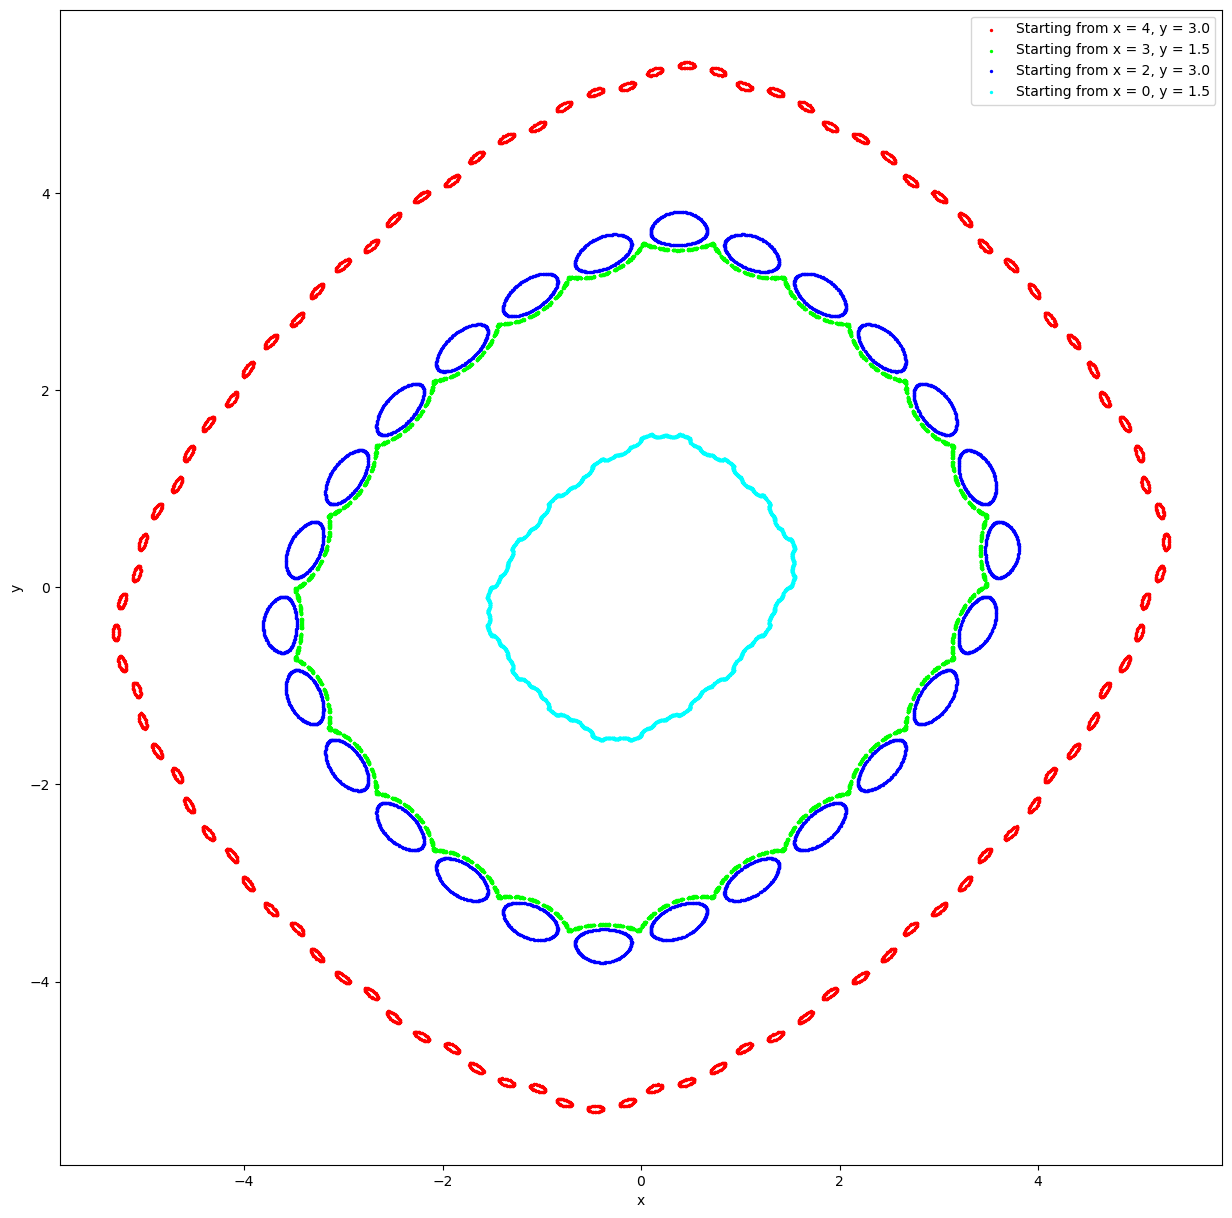

In [4]:
df_xsqrtx = lambda x: 0.4 * np.sign(x) * np.sqrt(np.abs(x))
dg_ysqrty = lambda y: 0.4 * np.sign(y) * np.sqrt(np.abs(y))
simulate_symplectic(df_xsqrtx, dg_ysqrty, 1, 5000, x0=np.array([4, 3, 2, 0]), y0=np.array([3, 1.5, 3, 1.5]))

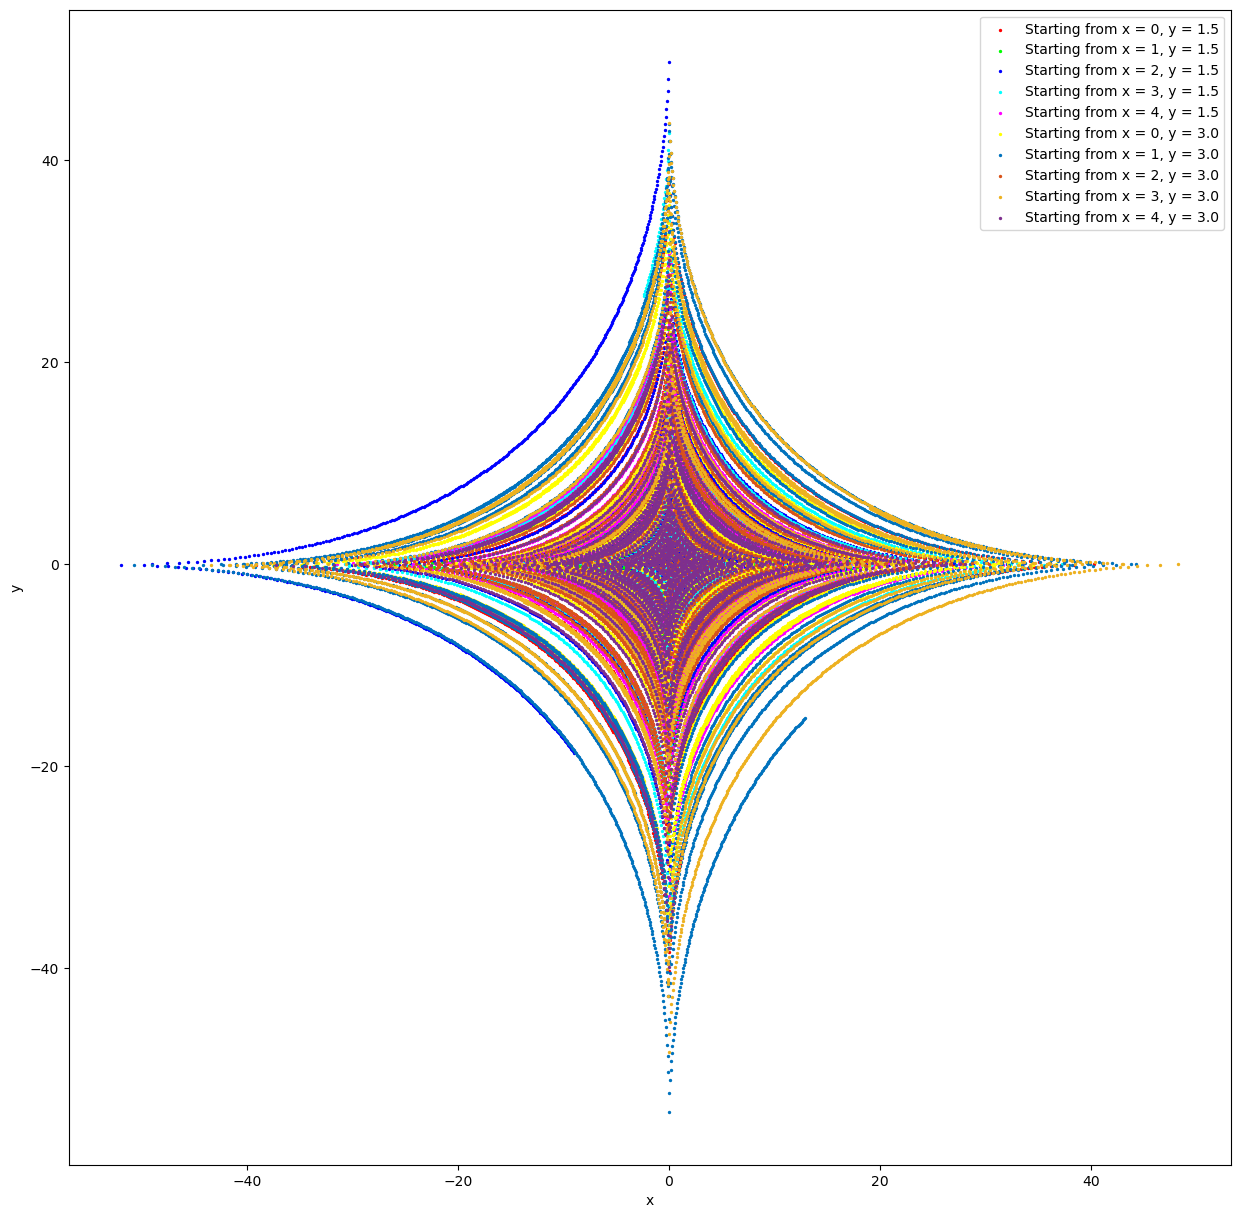

In [5]:
df_sqrtx = lambda x: 0.4 * np.sign(x) / np.sqrt(np.abs(x))
dg_sqrty = lambda y: 0.4 * np.sign(y) / np.sqrt(np.abs(y))
simulate_symplectic(df_sqrtx, dg_sqrty, 1, 5000)

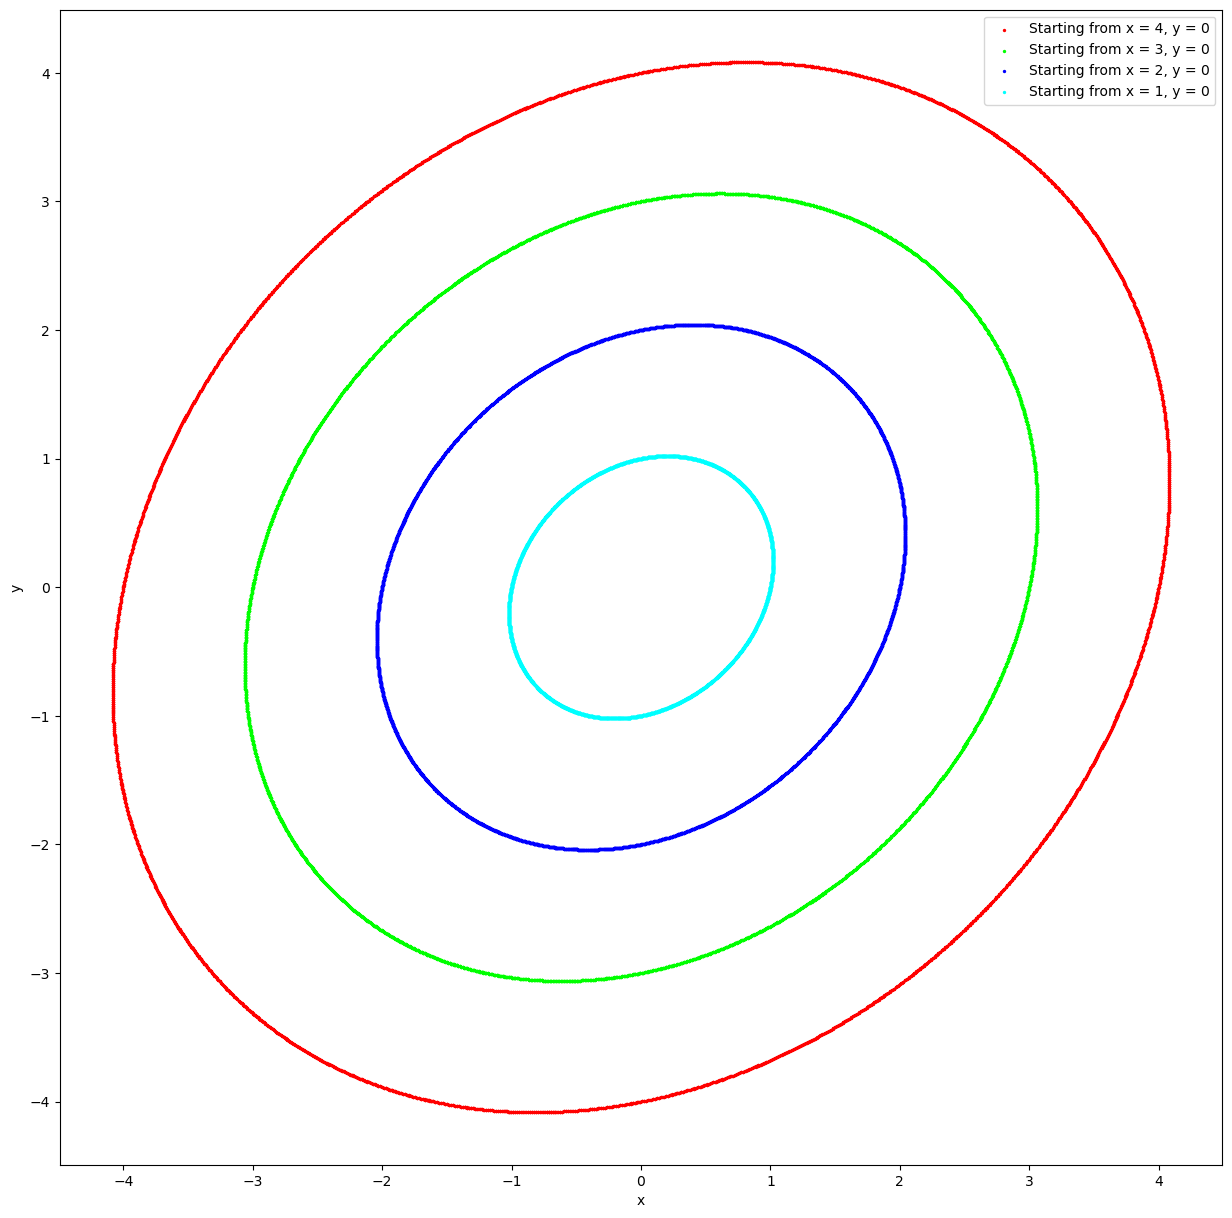

In [6]:
df_sqredx = lambda x: 0.4 * x
dg_sqredy = lambda y: 0.4 * y
simulate_symplectic(df_sqredx, dg_sqredy, 1, 5000, x0=np.array([4, 3, 2, 1]), y0=np.array([0, 0, 0, 0]))

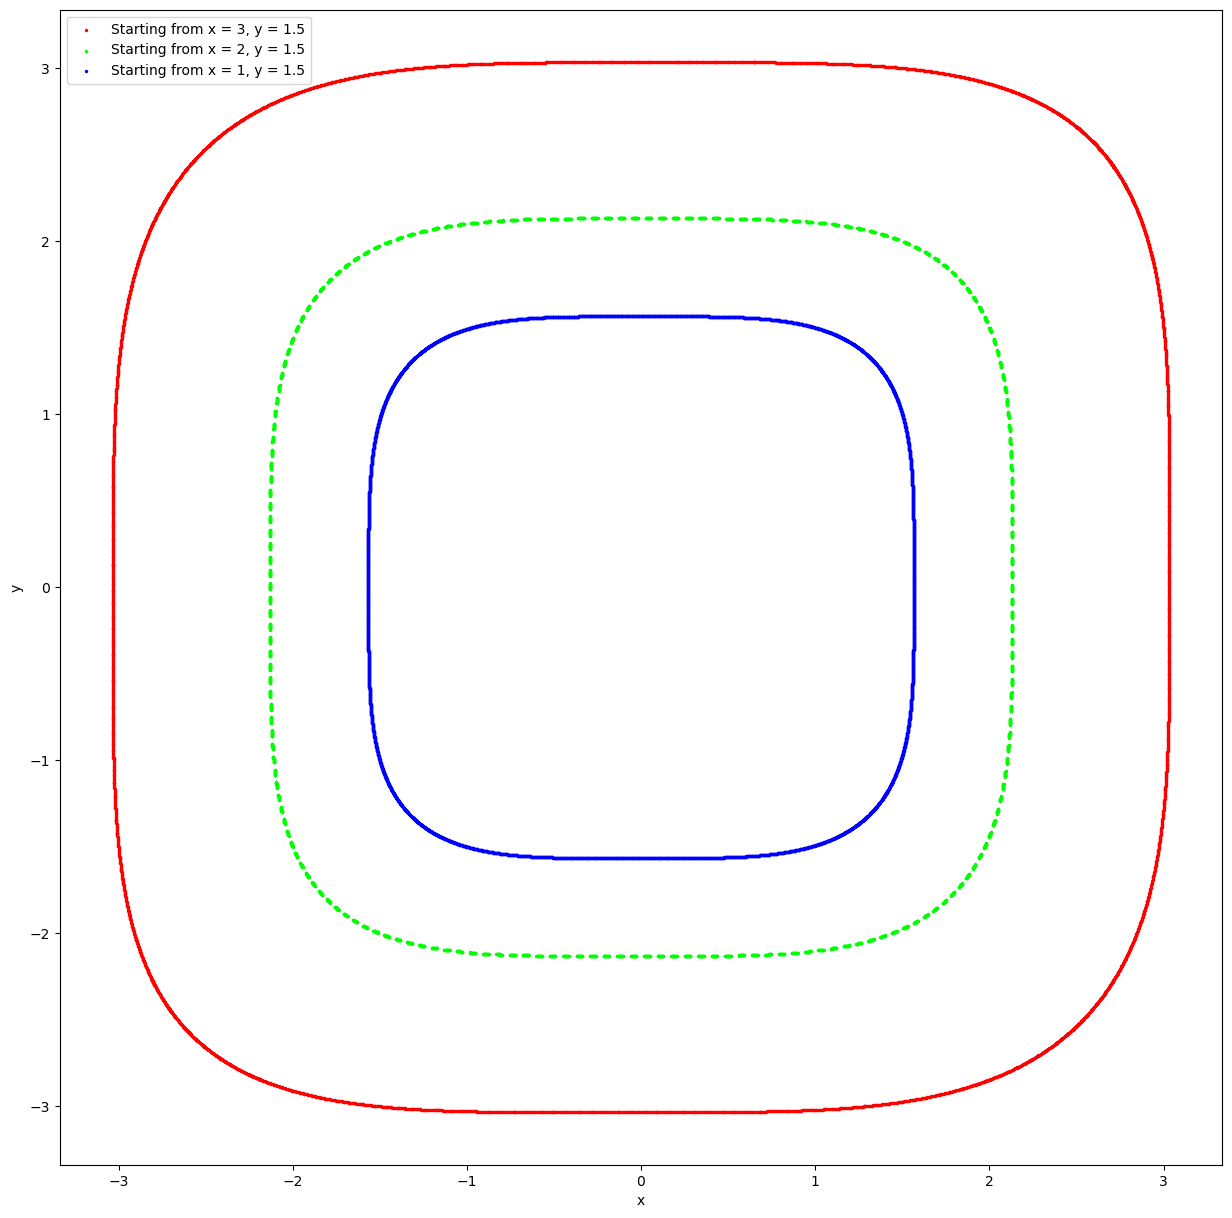

In [7]:
df_quadx = lambda x: 0.4 * x**3
dg_quady = lambda y: 0.4 * y**3
simulate_symplectic(df_quadx, dg_quady, 0.02, 5000, x0=[3, 2, 1], y0 = [1.5, 1.5, 1.5])

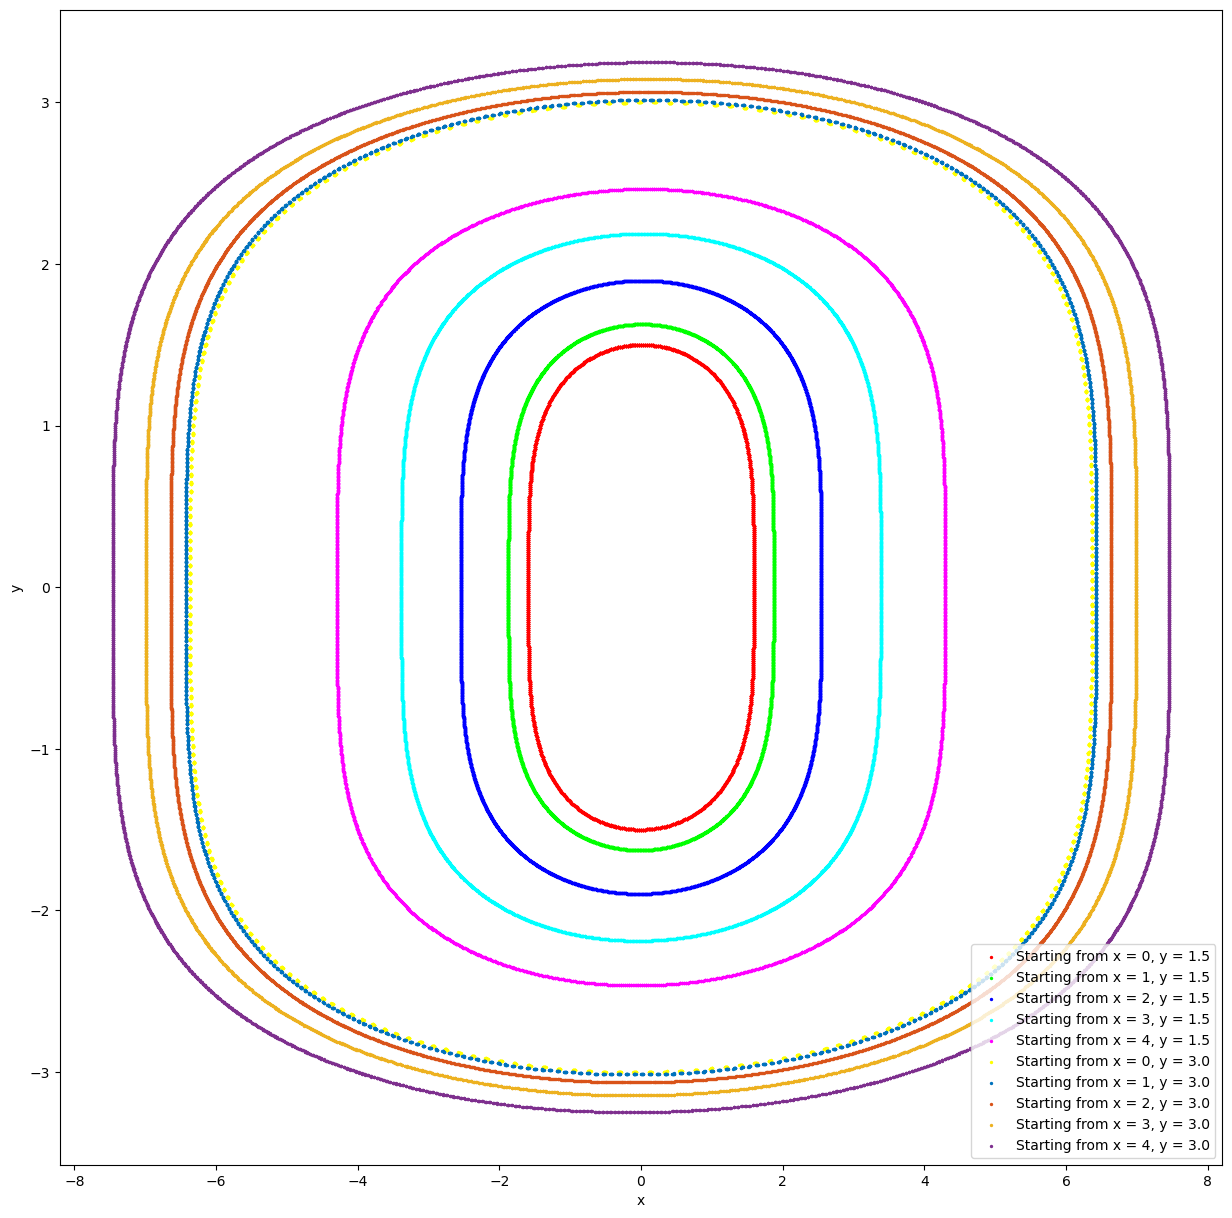

In [8]:
df_sqredx = lambda x: 0.4 * x
dg_quady = lambda y: 0.4 * y**3
simulate_symplectic(df_sqredx, dg_quady, 0.02, 5000)

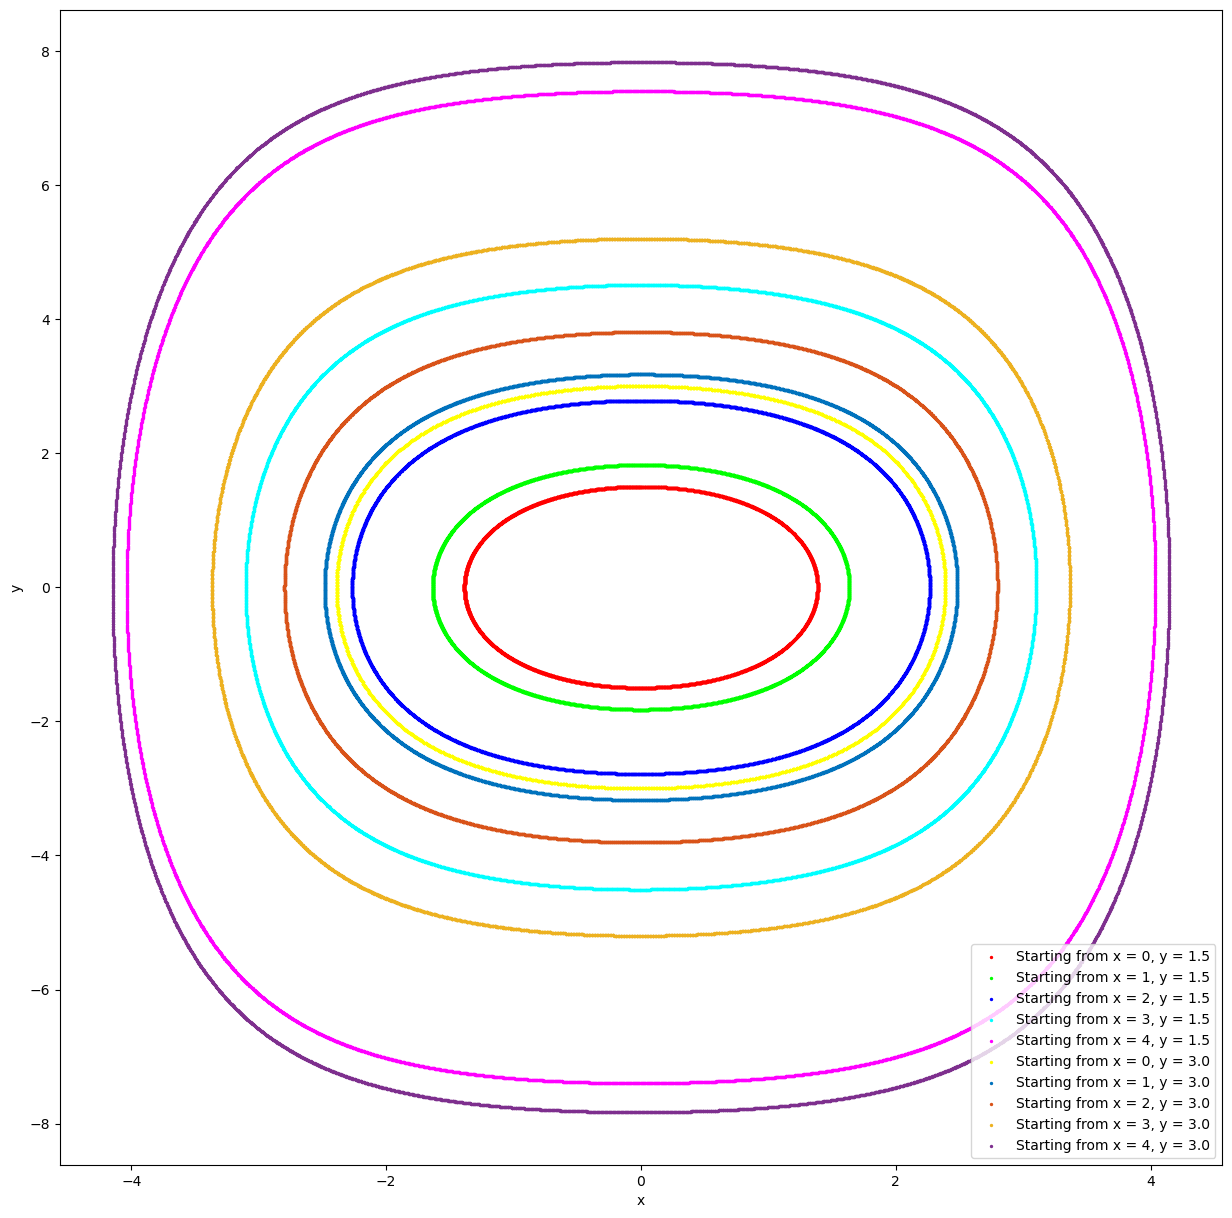

In [9]:
df_coshx = lambda x: 0.4 * np.sinh(x)
dg_sqredy = lambda y: 0.4 * y
simulate_symplectic(df_coshx, dg_sqredy, 0.01, 5000)

In [ ]:
df_logcoshx = lambda x: 0.4 * np.tanh(x)
dg_logcoshy = lambda y: 0.4 * np.tanh(y)
simulate_symplectic(df_logcoshx, dg_logcoshy, 0.1, 5000)

In [ ]:
df_logcoshx = lambda x: 0.4 * np.tanh(x)
dg_sqredy = lambda y: 0.4 * y
simulate_symplectic(df_logcoshx, dg_sqredy, 0.1, 5000)

In [ ]:
H_0_logcosh = lambda x, y: np.log(np.cosh(x)) + np.log(np.cosh(y))
H_1_logcosh = lambda x, y: -0.5*np.tanh(x)*np.tanh(y)
H_2_logcosh = lambda x, y: (1/12)*np.tanh(x)**2*np.cosh(y)**(-2)+(1/12)*np.tanh(y)**2*np.cosh(x)**(-2)
H_3_logcosh = lambda x, y: -(1/12)*np.tanh(x)*np.tanh(y)*np.cosh(x)**(-2)*np.cosh(y)**(-2)

<Figure size 432x288 with 0 Axes>

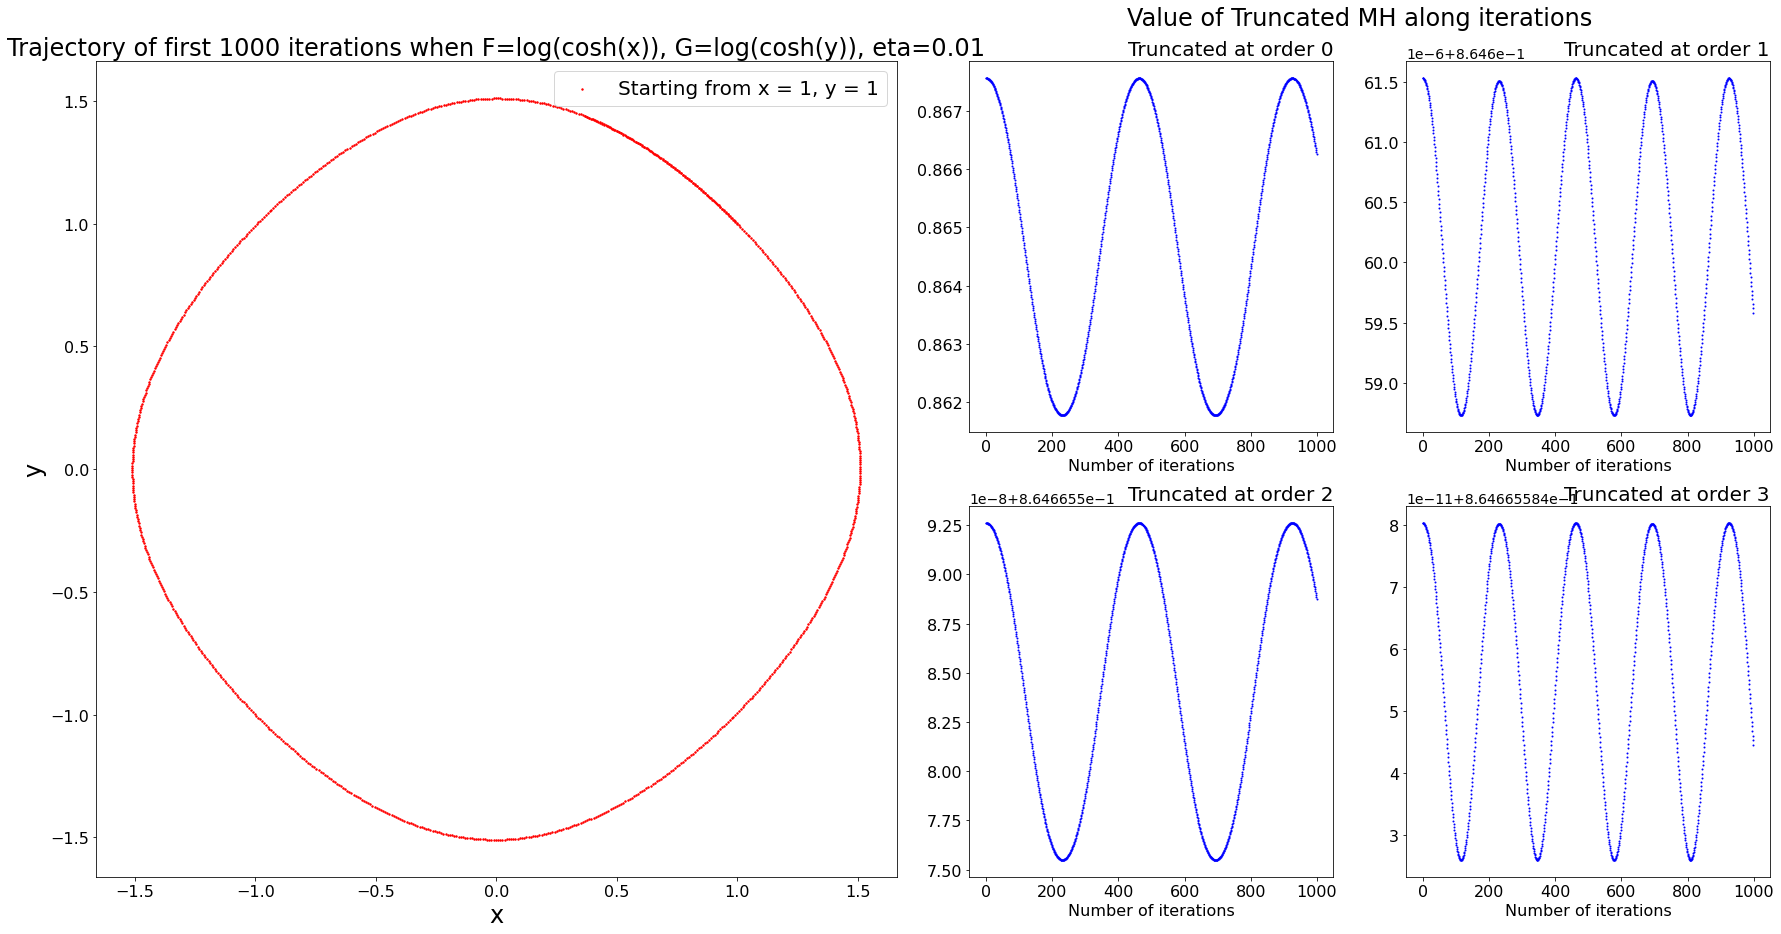

<Figure size 864x864 with 0 Axes>

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_withenergy_logcosh(df, dg, eta, max_iter, x0=np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4]), y0=np.array([1.5, 1.5, 1.5, 1.5, 1.5, 3, 3, 3, 3, 3])):
    # Initialization
    iter = max_iter

    # Initialize x and y arrays
    x = np.zeros((len(x0), iter + 1))
    y = np.zeros((len(x0), iter + 1))
    x[:, 0] = x0
    y[:, 0] = y0

    # Iterative process
    for i in range(iter):
        x[:, i + 1] = x[:, i] - eta * dg(y[:, i])
        y[:, i + 1] = y[:, i] + eta * df(x[:, i + 1])

    # Colors for plotting
    colors = [
        [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0],
        [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250],
        [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330],
        [0.6350, 0.0780, 0.1840]
    ]

    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize=(30, 15))
    gs = gridspec.GridSpec(2, 4)
    ax1 = plt.subplot(gs[:, :2])
    ax2 = plt.subplot(gs[0, 2])
    ax3 = plt.subplot(gs[0, 3])
    ax4 = plt.subplot(gs[1, 2])
    ax5 = plt.subplot(gs[1, 3])

    axs = [ax1, ax2, ax3, ax4, ax5]
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.yaxis.get_offset_text().set_fontsize(14)

    # Plotting
    plt.figure(figsize=(12, 12))
    for i in range(len(x0)):
        ax1.scatter(x[i, :], y[i, :], s=2, c=[colors[i]], label=f'Starting from x = '+str(x0[i])+', y = '+str(y0[i]))
    ax1.set_xlabel('x', fontsize='24')
    ax1.set_ylabel('y', fontsize='24')
    ax1.legend(fontsize='20', loc='upper right')
    ax1.set_title('Trajectory of first '+str(max_iter)+' iterations when F=log(cosh(x)), G=log(cosh(y)), eta=0.01', fontsize=24)
    
    H_0_logcosh = lambda x, y: np.log(np.cosh(x)) + np.log(np.cosh(y))
    H_1_logcosh = lambda x, y: np.log(np.cosh(x)) + np.log(np.cosh(y))-eta*0.5*np.tanh(x)*np.tanh(y)
    H_2_logcosh = lambda x, y: np.log(np.cosh(x)) + np.log(np.cosh(y))-eta*0.5*np.tanh(x)*np.tanh(y)+eta**2*(1/12)*np.tanh(x)**2*np.cosh(y)**(-2)+eta**2*(1/12)*np.tanh(y)**2*np.cosh(x)**(-2)
    H_3_logcosh = lambda x, y: np.log(np.cosh(x)) + np.log(np.cosh(y))-eta*0.5*np.tanh(x)*np.tanh(y)+eta**2*(1/12)*np.tanh(x)**2*np.cosh(y)**(-2)+eta**2*(1/12)*np.tanh(y)**2*np.cosh(x)**(-2)-eta**3*(1/12)*np.tanh(x)*np.tanh(y)*np.cosh(x)**(-2)*np.cosh(y)**(-2)

    H_list = [H_0_logcosh, H_1_logcosh, H_2_logcosh, H_3_logcosh]

    for j in range(4):
        axs[j+1].set_title("Truncated at order "+str(j), fontsize=20, loc='right')
        for i in range(max_iter):
            axs[j+1].scatter(i, H_list[j](x[:, i], y[:, i]), s=1, color=[0, 0, 1])

    for ax in axs[1:]:
        ax.set_xlabel('Number of iterations', fontsize='16')

    ax2.text(0.71, 0.92, 'Value of Truncated MH along iterations', ha='center', va='center', transform=fig.transFigure, fontsize=24)

plt.tight_layout()
plt.show()

df_logcoshx = lambda x: np.tanh(x)
dg_logcoshy = lambda y: np.tanh(y)
simulate_withenergy_logcosh(df_logcoshx, dg_logcoshy, 0.01, 1000, x0=[1], y0=[1])

<Figure size 640x480 with 0 Axes>

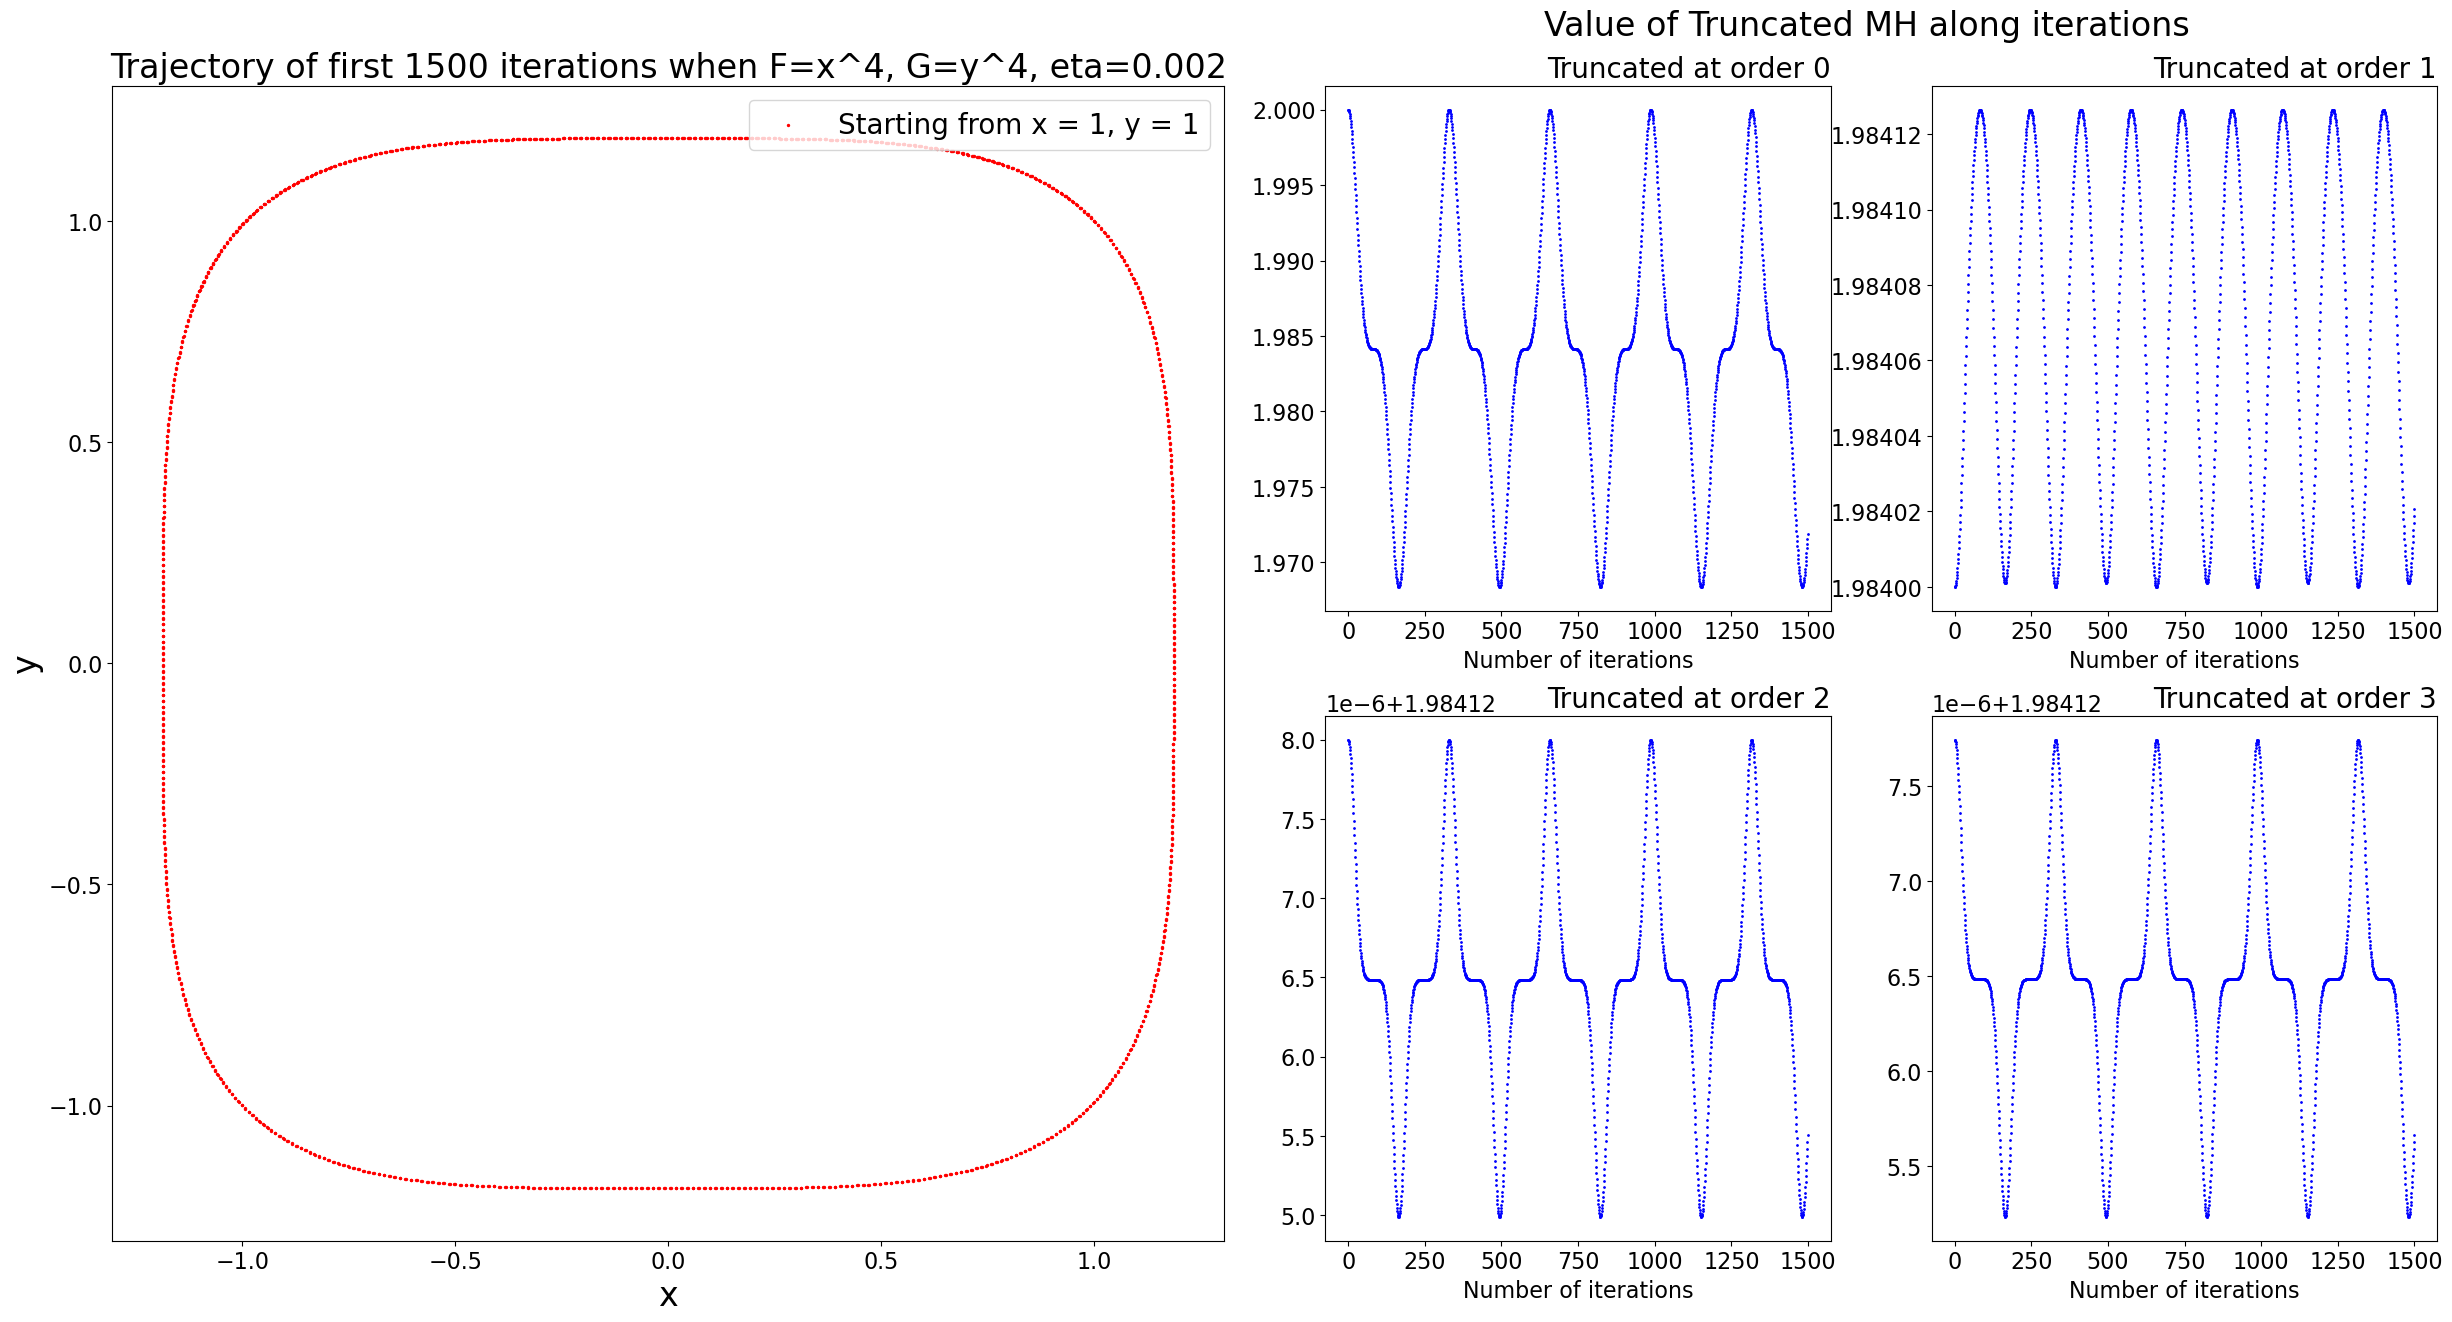

<Figure size 1200x1200 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_withenergy_fourthorder(df, dg, eta, max_iter, x0=np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4]), y0=np.array([1.5, 1.5, 1.5, 1.5, 1.5, 3, 3, 3, 3, 3])):
    # Initialization
    iter = max_iter

    # Initialize x and y arrays
    x = np.zeros((len(x0), iter + 1))
    y = np.zeros((len(x0), iter + 1))
    x[:, 0] = x0
    y[:, 0] = y0

    # Iterative process
    for i in range(iter):
        x[:, i + 1] = x[:, i] - eta * dg(y[:, i])
        y[:, i + 1] = y[:, i] + eta * df(x[:, i + 1])

    # Colors for plotting
    colors = [
        [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0],
        [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250],
        [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330],
        [0.6350, 0.0780, 0.1840]
    ]

    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize=(30, 15))
    gs = gridspec.GridSpec(2, 4)
    ax1 = plt.subplot(gs[:, :2])
    ax2 = plt.subplot(gs[0, 2])
    ax3 = plt.subplot(gs[0, 3])
    ax4 = plt.subplot(gs[1, 2])
    ax5 = plt.subplot(gs[1, 3])

    axs = [ax1, ax2, ax3, ax4, ax5]
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.yaxis.get_offset_text().set_fontsize(16)

    # Plotting
    plt.figure(figsize=(12, 12))
    for i in range(len(x0)):
        ax1.scatter(x[i, :], y[i, :], s=2, c=[colors[i]], label=f'Starting from x = '+str(x0[i])+', y = '+str(y0[i]))
    ax1.set_xlabel('x', fontsize='24')
    ax1.set_ylabel('y', fontsize='24')
    ax1.legend(fontsize='20', loc='upper right')
    ax1.set_title('Trajectory of first '+str(max_iter)+' iterations when F=x^4, G=y^4, eta=0.002', fontsize=24)
    

    H_0_fourthorder = lambda x, y: x**4 + y**4
    H_1_fourthorder = lambda x, y: x**4 + y**4 - eta*8*x**3*y**3
    H_2_fourthorder = lambda x, y: x**4 + y**4 - eta*8*x**3*y**3+eta**2*16*x**6*y**2+eta**2*16*x**2*y**6
    H_3_fourthorder = lambda x, y: x**4 + y**4 - eta*8*x**3*y**3+eta**2*16*x**6*y**2+eta**2*16*x**2*y**6-eta**3*32*x**5*y**5

    H_list = [H_0_fourthorder, H_1_fourthorder, H_2_fourthorder, H_3_fourthorder]

    for j in range(4):
        axs[j+1].set_title("Truncated at order "+str(j), fontsize=20, loc='right')
        for i in range(max_iter):
            axs[j+1].scatter(i, H_list[j](x[:, i], y[:, i]), s=1, color=[0, 0, 1])

    for ax in axs[1:]:
        ax.set_xlabel('Number of iterations', fontsize='16')

    ax2.text(0.71, 0.92, 'Value of Truncated MH along iterations', ha='center', va='center', transform=fig.transFigure, fontsize=24)

plt.tight_layout()
plt.show()

df_quadx = lambda x: 4 * x**3
dg_quady = lambda y: 4 * y**3
simulate_withenergy_fourthorder(df_quadx, dg_quady, 0.002, 1500, x0=[1], y0 = [1])